In [68]:
# Import libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:
import pandas as pd

# Load training set data
X_train = pd.read_csv('train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('train/y_train.txt', header=None)
subject_train = pd.read_csv('train/subject_train.txt', header=None)

# Load features and activity labels
features = pd.read_csv('features.txt', delim_whitespace=True, header=None, names=['Feature_Index', 'Feature_Name'])
activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace=True, header=None, names=['Activity_Index', 'Activity_Name'])

# Set column names for X_train
X_train.columns = features['Feature_Name']

# Set column name for y_train
y_train.columns = ['Activity_Index']

# Set column name for subject_train
subject_train.columns = ['Subject_ID']

# Map activity labels to their corresponding names
y_train['Activity_Name'] = y_train['Activity_Index'].map(activity_labels.set_index('Activity_Index')['Activity_Name'])

# Combine features, labels, and subject IDs
combined_train_data = pd.concat([subject_train, y_train, X_train], axis=1)

# Display the combined data
combined_train_data.drop_duplicates()


,Subject_ID,Activity_Index,Activity_Name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,STANDING,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,STANDING,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,STANDING,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,STANDING,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,STANDING,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,2,WALKING_UPSTAIRS,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,30,2,WALKING_UPSTAIRS,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,30,2,WALKING_UPSTAIRS,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,30,2,WALKING_UPSTAIRS,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [70]:
x = combined_train_data.drop(columns=["Activity_Name"])

y = combined_train_data['Activity_Name']


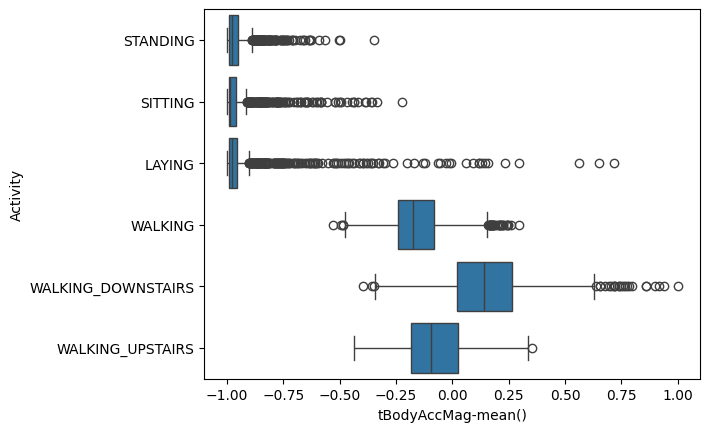

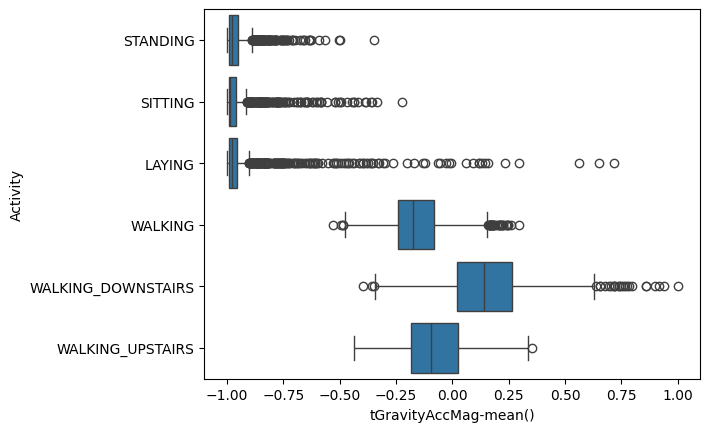

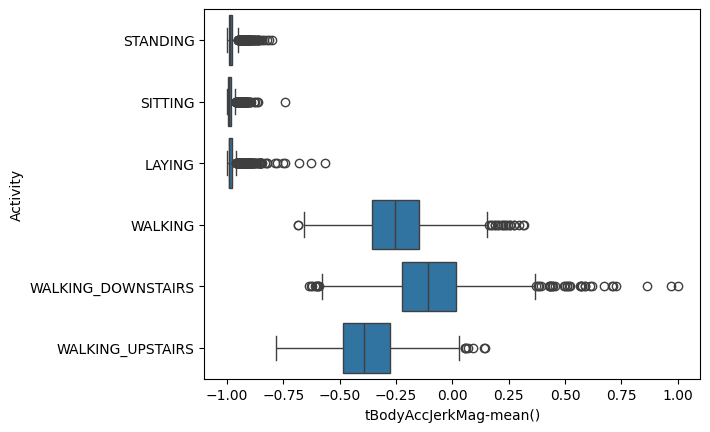

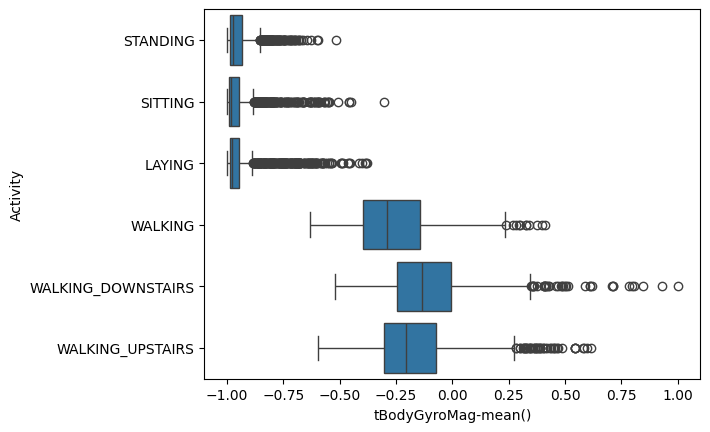

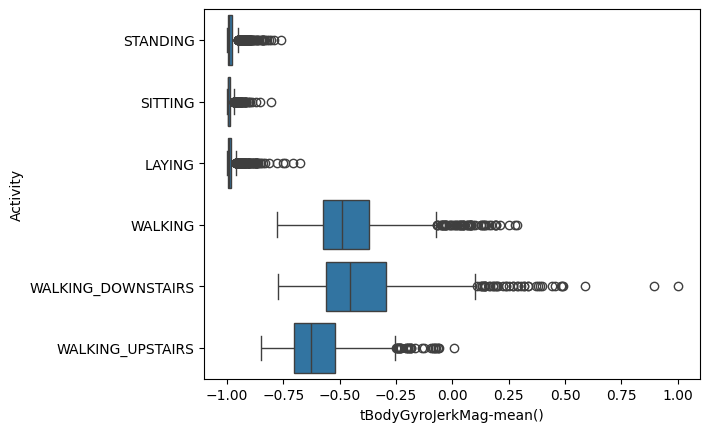

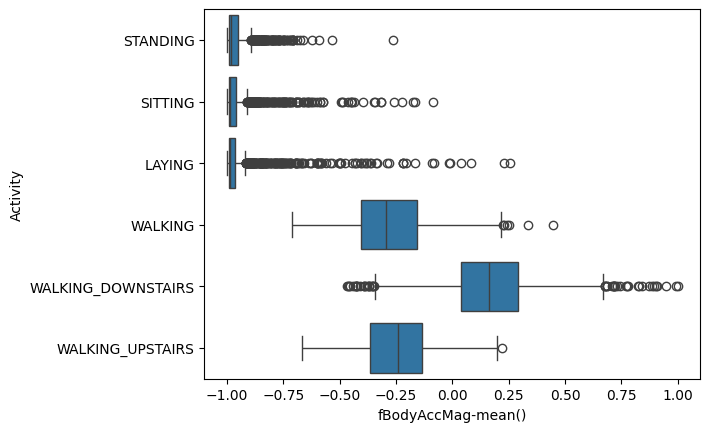

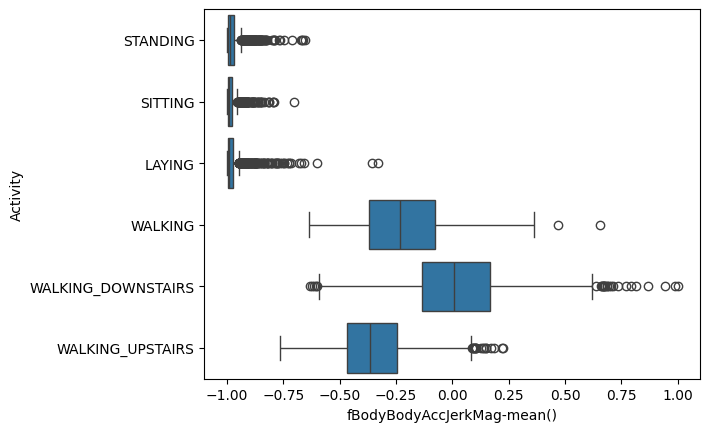

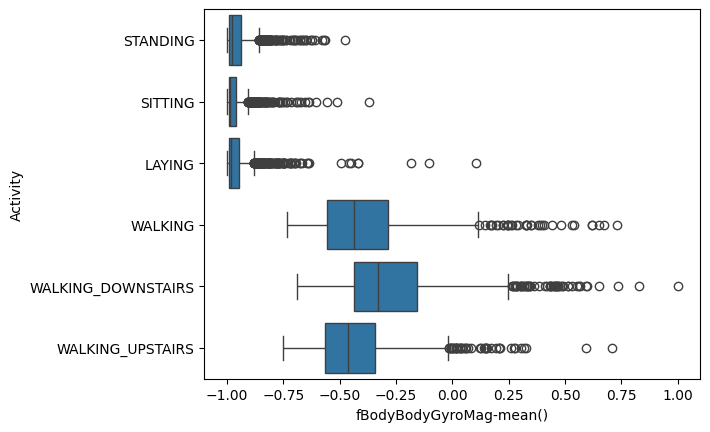

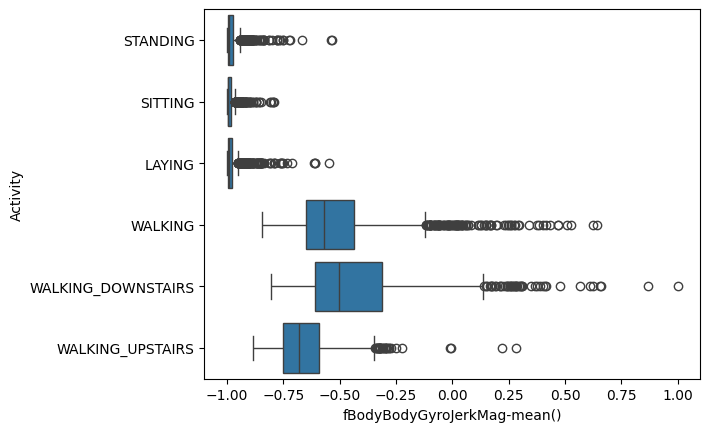

In [71]:
# Create boxplots of magnitude of 3-Dimensional signals and magnitude of frequency domain signals.
categories = ['tBodyAccMag-mean()', 'tGravityAccMag-mean()', 'tBodyAccJerkMag-mean()', 
              'tBodyGyroMag-mean()', 'tBodyGyroJerkMag-mean()', 'fBodyAccMag-mean()', 
              'fBodyBodyAccJerkMag-mean()', 'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroJerkMag-mean()']
for i in categories:
    sns.boxplot(x=i, y='Activity_Name', data=combined_train_data, orient='h')
    plt.ylabel('Activity')
    plt.show()

In [72]:

# Find the mean of each feature grouped by the subject ID and activity name.
dfmean = combined_train_data.groupby(['Subject_ID', 'Activity_Name']).mean()

# Extract subset of columns in categories and assign to variable x
x = dfmean[categories]
print(x.head())

y = dfmean.reset_index()['Activity_Name']
print(y.head())


                               tBodyAccMag-mean()  tGravityAccMag-mean()  \
Subject_ID Activity_Name                                                   
1          LAYING                       -0.841929              -0.841929   
           SITTING                      -0.948537              -0.948537   
           STANDING                     -0.984278              -0.984278   
           WALKING                      -0.136971              -0.136971   
           WALKING_DOWNSTAIRS            0.027188               0.027188   

                               tBodyAccJerkMag-mean()  tBodyGyroMag-mean()  \
Subject_ID Activity_Name                                                     
1          LAYING                           -0.954396            -0.874760   
           SITTING                          -0.987364            -0.930892   
           STANDING                         -0.992368            -0.976494   
           WALKING                          -0.141429            -0.160980   

In [73]:
# Split x and y into training and testing sets with seed 0.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Apply StandardScaler to x_train and x_test
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create svm.SVC object and assign to variable svm.
svm = svm.SVC()

# Fit SVM on training data
svm.fit(x_train_scaled, y_train)

# Predict with input of testing data and assign the result to variable predictions1.
predictions1 = svm.predict(x_test_scaled)

# Calculate the accuracy_score on the y testing data and the test predictions and assign the result to the variable score1.
score1 = accuracy_score(y_test, predictions1)

# Print accuracy score. 
print('Accuracy score for Support Vector Machine:', score1)


Accuracy score for Support Vector Machine: 0.4375


In [135]:
from sklearn import svm
import random
svm = svm.SVC()
import heapq
max_heap = []

def setXandY():
  for i in range(3000):
    column_names = np.array(combined_train_data.columns)[3:]
    random.seed(i)
    selected_columns = random.sample(column_names.tolist(), k=random.randint(1, 561))
    x = dfmean[selected_columns]
    # Split x and y into training and testing sets with seed 0.
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

    # Apply StandardScaler to x_train and x_test
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # Create svm.SVC object and assign to variable svm.
    

    # Fit SVM on training data
    svm.fit(x_train_scaled, y_train)
    # Predict with input of testing data and assign the result to variable predictions1.
    predictions1 = svm.predict(x_test_scaled)

    # Calculate the accuracy_score on the y testing data and the test predictions and assign the result to the variable score1.
    score1 = accuracy_score(y_test, predictions1)

    # Print accuracy score. 
    heapq.heappush(max_heap, [score1, selected_columns])
    # print(max_heap)
    # print('Accuracy score for Support Vector Machine:', score1)
  return heapq.nlargest(10, max_heap)

In [136]:
temp = setXandY()
for i in temp:
  print(i[0])
  print(i[1])


0.9375
['tBodyAccJerk-iqr()-Y', 'tBodyGyroJerkMag-sma()', 'fBodyAccJerk-bandsEnergy()-41,48', 'tBodyGyro-entropy()-X', 'tBodyGyro-energy()-Z', 'tGravityAcc-energy()-X', 'tBodyAcc-entropy()-X', 'tBodyGyroJerk-iqr()-Z', 'tGravityAcc-mean()-X', 'fBodyAccJerk-bandsEnergy()-1,8', 'tGravityAcc-mad()-Z', 'tGravityAcc-entropy()-X', 'fBodyAcc-bandsEnergy()-57,64', 'tBodyAccJerk-iqr()-X', 'tBodyGyroJerk-arCoeff()-Y,4', 'fBodyAccMag-mad()', 'tBodyGyro-iqr()-Y', 'tGravityAcc-arCoeff()-X,1', 'fBodyAccJerk-bandsEnergy()-25,48', 'tBodyAccJerk-max()-Z', 'tBodyGyroJerk-mean()-Y', 'tBodyAcc-arCoeff()-Y,4', 'fBodyAccJerk-bandsEnergy()-41,48', 'fBodyAccJerk-mad()-X', 'fBodyGyro-bandsEnergy()-33,48', 'fBodyGyro-bandsEnergy()-49,56', 'fBodyAcc-mean()-Z', 'fBodyAccJerk-bandsEnergy()-1,24', 'tBodyGyroJerkMag-iqr()', 'fBodyGyro-bandsEnergy()-1,16', 'tBodyGyro-arCoeff()-Y,2', 'fBodyBodyGyroJerkMag-std()', 'fBodyAcc-maxInds-X', 'tBodyAcc-arCoeff()-X,4', 'fBodyAccJerk-maxInds-X', 'fBodyGyro-bandsEnergy()-49,56', 

In [150]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import random
from sklearn import svm
svm = svm.SVC()
import heapq
max_heap_one = []

# Load your DataFrame 'df' here



results = []

def treeClassifier():
    for i in range(50):
    # Step 1: Randomly select subset of features
        column_names = np.array(combined_train_data.columns)[3:]
        random.seed(i)
        selected_columns = random.sample(column_names.tolist(), k=random.randint(1, 561))
        X = dfmean[selected_columns]
        
        # Step 2: Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Step 3: Define model and hyperparameters
        tree = DecisionTreeClassifier()
        param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
        
        # Step 4: Perform randomized search with cross-validation
        search = RandomizedSearchCV(tree, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=5)
        search.fit(X_train, y_train)
        
        # Step 5: Evaluate best model on test set
        best_model = search.best_estimator_
        y_pred = best_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        heapq.heappush(max_heap_one, [accuracy, selected_columns])
        
    return heapq.nlargest(10, max_heap_one)

In [151]:
temp = treeClassifier()
for i in temp:
  print(i[0])
  print(i[1])

0.9230769230769231
['tBodyGyroMag-arCoeff()1', 'tBodyAcc-entropy()-Z', 'fBodyGyro-kurtosis()-Y', 'tBodyGyroJerk-arCoeff()-X,4', 'tBodyGyro-std()-X', 'fBodyAccJerk-max()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerkMag-arCoeff()3', 'fBodyAcc-max()-Y', 'tGravityAcc-max()-Y', 'fBodyAcc-bandsEnergy()-49,64', 'tBodyGyroJerk-entropy()-Y', 'fBodyGyro-energy()-Y', 'tGravityAcc-max()-X', 'tBodyAcc-iqr()-Z', 'fBodyAcc-std()-Z', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyGyro-mad()-Z', 'tBodyGyroJerk-arCoeff()-Z,2', 'tBodyGyroJerk-entropy()-Z', 'tBodyAccJerk-arCoeff()-Z,2', 'tGravityAcc-entropy()-X', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-1,24', 'tBodyGyroJerkMag-arCoeff()4', 'angle(tBodyGyroJerkMean,gravityMean)', 'fBodyAccJerk-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyBodyAccJerkMag-kurtosis()', 'tBodyGyro-arCoeff()-X,1', 'fBodyAcc-iqr()-Z', 'fBodyAcc-min()-X', 'tBodyGyroJerk-arCoeff()-Y,1', 'fBodyGyro-iqr()-X', 'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyAccJerk-mad()-X